In [1]:
import beatmap as bt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, widgets
from IPython.display import HTML, Javascript, display

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide raw code"></form>''')

# BET
This notebook aims to provide a better understanding of Brunauer–Emmett–Teller (BET) theory, and, hopefully, a more accurate specific surface area answer.

Analysis of adsorption isotherms by BET theory is easily done, and easily done incorrectly. A paper by Roquerol et at describes five criteria that can be used to determine which relative pressure ranges of an isotherm follow the assumptions of BET Theory [1](#references).

As an example, this notebook uses data for a cyclohexane adsorption isotherm on carbon black:

|P/Po |n [mol/g]|
|-|-|
|0.010|0.00055797|
|0.020|0.00068050|
|0.030|0.00076186|
|0.040|0.00082042|
|0.050|0.00086352|
|0.060|0.00089899|
|0.070|0.00093262|
|0.080|0.00095784|
|0.090|0.00098287|
|0.100|0.00100306|
|0.125|0.00105080|
|0.150|0.00108762|
|0.175|0.00111806|
|0.200|0.00114453|
|0.225|0.00116956|
|0.250|0.00119198|
|0.275|0.00121517|
|0.300|0.00123701|
|0.350|0.00127731|
|0.400|0.00132157|
|0.450|0.00136776|
|0.500|0.00141743|
|0.550|0.00147319|
|0.600|0.00153784|
|0.700|0.00170820|
|0.800|0.00198351|
|0.900|0.00256767|

Data can also imported from .csv files with two columns of data: relative pressure on the left and amount adsorbed (n, g/mol) on the right.

The user provides the adsorbate information, adsorbed cross sectional area has units of square Angstrom. Common values are:

| Adsorbate | Cross Sectional Area |
| --- | --- |
| N2 | 16.2 |
| Water | 10.5 |
| Ethanol | 35.3 |
| Cyclohexane | 39 |

In [2]:
#cyclohexane adsorption on vulcan xc-72
relp = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9] 
n = [0.00055797, 0.0006805, 0.00076186, 0.00082042, 0.00086352, 0.00089899, 0.00093262, 0.00095784, 0.00098287, 0.00100306, 0.0010508, 0.00108762, 0.00111806, 0.00114453, 0.00116956, 0.00119198, 0.00121517, 0.00123701, 0.00127731, 0.00132157, 0.00136776, 0.00141743, 0.00147319, 0.00153784, 0.0017082, 0.00198351, 0.00256767]
   
file, data, adsorbate, a_o = bt.io.import_list_data(relp, n)
sa, c, nm, err, linreg = bt.core.bet(data, a_o)

Enter name for dataset:example
Enter name of adsorbate used:chex
Enter cross sectional area of adsorbate in square Angstrom:39

Adsorbate used was chex with an adsorbed cross sectional area of 39.00 sq. Angstrom.

Isotherm data quality appears good.
Adsorbed molar amounts are increasing as relative pressure increases.
Isotherm is type II.


Experimental data plot saved as: experimentaldata_exa.png


()

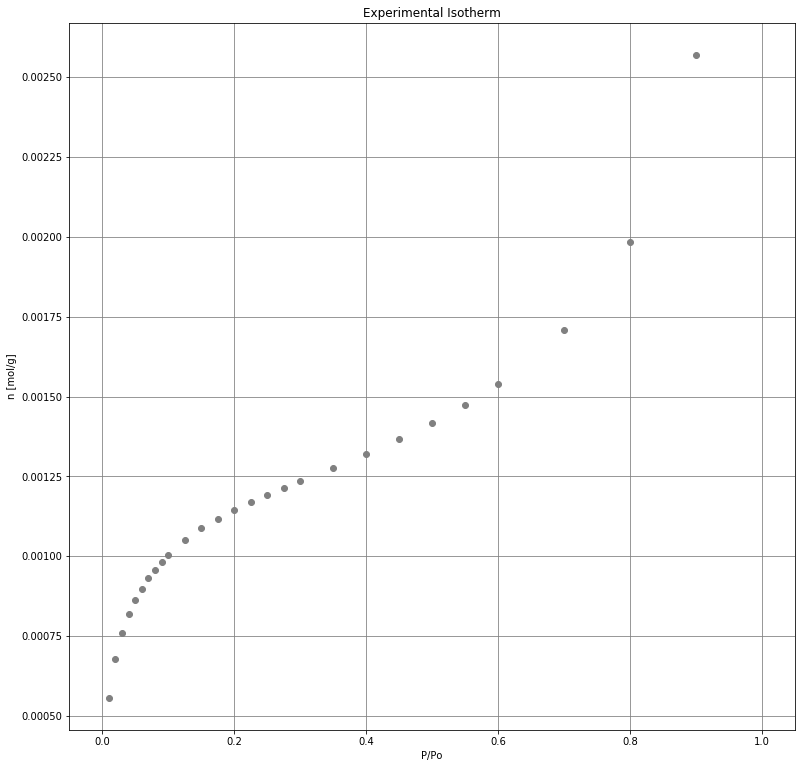

In [3]:
bt.vis.experimental_data_plot(data, file)

## The Five Checks

The five checks for BET validity can be grouped into three categories. The first two checks are validity checks, the second two checks are consistency checks, and the fifth check is just a minimum number of data points, set by the user, to be considered a valid relative pressure range.

Check 1: n(Po-P) must increase as relative pressure inceases.

Check 2: positive y-intercept of BET equation (ie positive 'C', the BET constant).

Check 3: the monolayer adsorbed amount, nm, must fall within the range of adsorbed amounts of the relative pressure interval.

Check 4: n is set to nm in the BET equation, and the equation is solved for relative pressure. This pressure is then check with the relative pressure corresopnding to monolayer completion and must agree within 10%.

Check 5: the minimum number of data points required for a relative pressure range to be considered valid.

In [4]:
mask_picker = interactive(bt.core.combine_masks, df=fixed(data), linreg=fixed(linreg), nm=fixed(nm), check1=True, check2=True, check3=True, check4=True, check5=True, points = (1,len(data),1))
display(mask_picker)

interactive(children=(Checkbox(value=True, description='check1'), Checkbox(value=True, description='check2'), …

In [5]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))    
    
button = widgets.Button(description="Update checks")
button.on_click(run_all)
display(button)

Button(description='Update checks', style=ButtonStyle())

<IPython.core.display.Javascript object>

The specific surface area value that results from BET analysis can be visulaized as a heatmap, where every cell represents a relative pressure range. The gradient of each cell corresponds to the specific surface area of that relative pressure range.

Specific surface area heatmap saved as: ssa_heatmap_exa.png


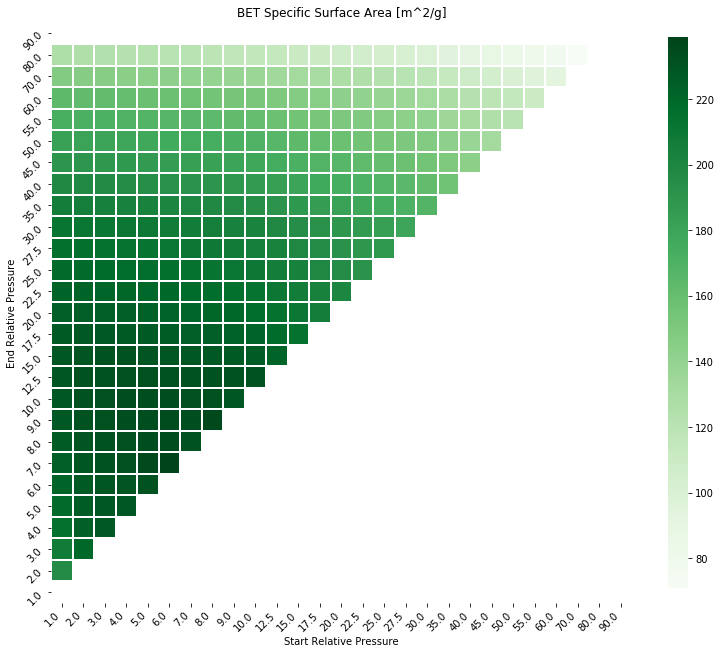

In [10]:
masked_sa = np.multiply(sa, mask_picker.result)
masked_c = np.multiply(c, mask_picker.result)
masked_nm = np.multiply(nm, mask_picker.result)
masked_error = np.multiply(err, mask_picker.result)

bt.vis.ssa_heatmap(data, masked_sa, file)

Error between the experimental data points and theoretical isotherm can also be visualized with a heatmap. 

A lower error indicates better agreement between experimental data and the BET equation over the realtive pressure range.

Error heatmap saved as: error_heatmap_exa.png


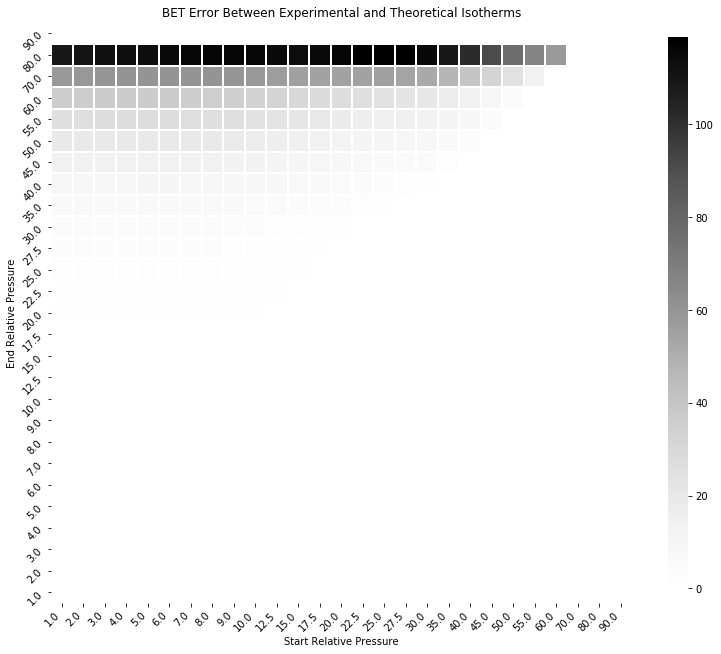

In [11]:
bt.vis.err_heatmap(data, masked_error, file)

The bet_combo_plot function creates BET Plots of the relative pressure ranges with the highest and lowest error for comparison.

BET plot saved as: betplot_exa.png


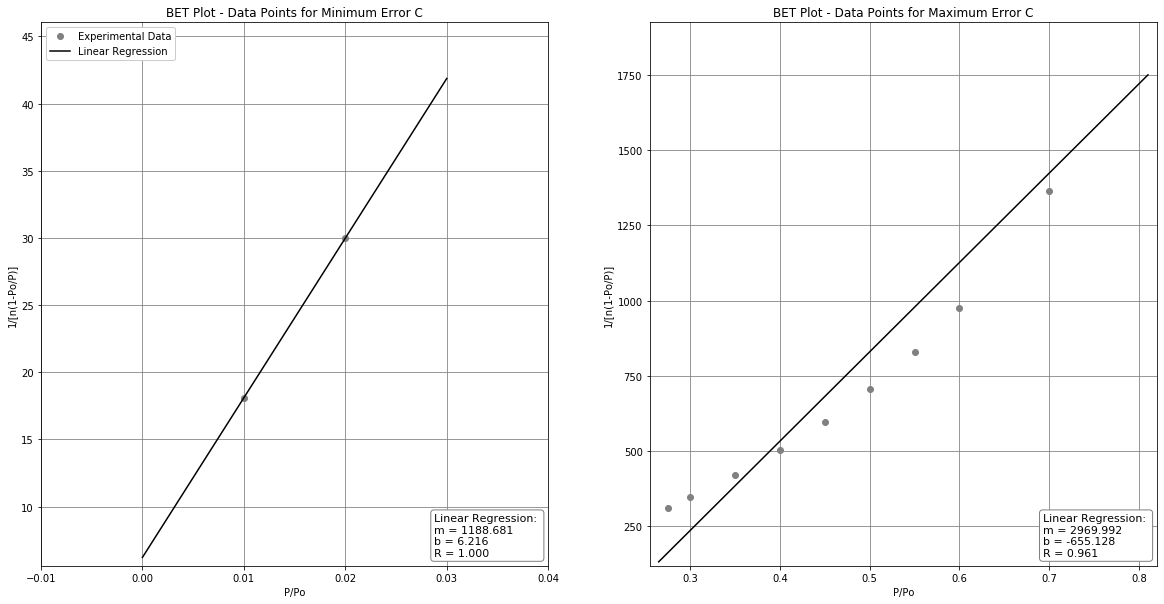

In [12]:
bt.vis.bet_combo_plot(masked_c, masked_error, data, file)

The bet_iso_combo_plot function creates a plot that shows the BET equation as a sum of two terms (the result of applying partial fractions to the BET equation) with experimental data points plotted on the same figure.

One can quickly get an idea of where in the relative pressure range the monolayer amount, nm, has been adsorbed by looking for where n/nm = 1.

Isotherm decomposition plot saved as: isothermcomp_exa.png


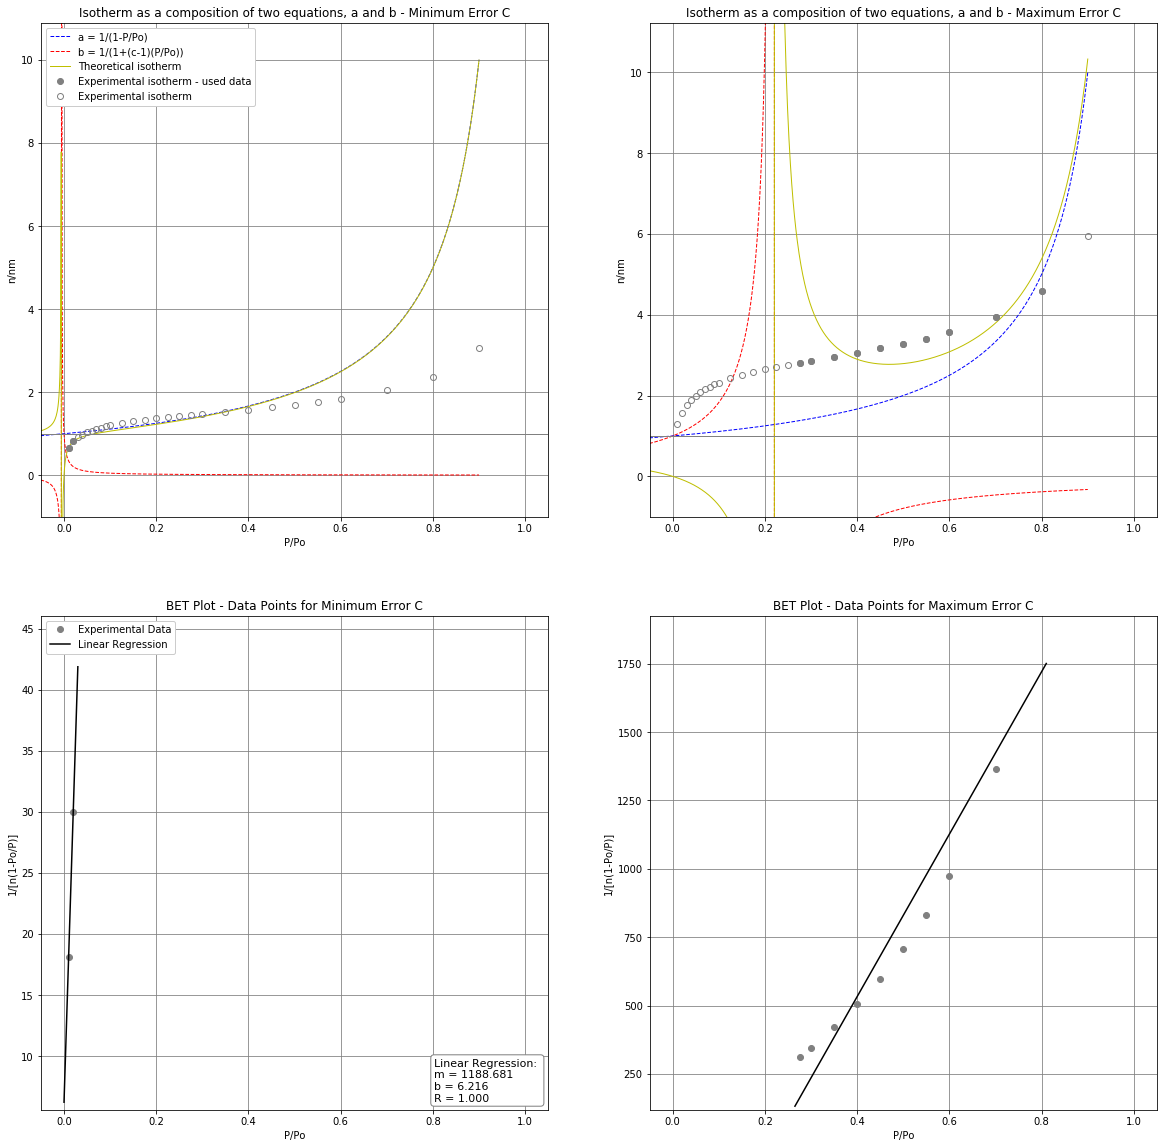

In [13]:
bt.vis.bet_iso_combo_plot(masked_c, masked_error, masked_sa, masked_nm, data, file)

<a id='references'></a>
## References
1. Rouquerol, J., P. Llewellyn, and F. Rouquerol. "Is the BET equation applicable to microporous adsorbents." Stud. Surf. Sci. Catal 160.07 (2007): 49-56.